In [1]:
!curl -L -o kingcountyhousing.zip https://www.kaggle.com/api/v1/datasets/download/vallabhadattap/kingcountyhousing

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0   146k      0 --:--:-- --:--:-- --:--:--  395k


In [2]:
from zipfile import ZipFile

with ZipFile("/content/kingcountyhousing.zip","r") as f:
    f.extractall()

In [3]:
ls

KC_housing_data.csv  kingcountyhousing.zip  sample_data/


In [4]:
import pandas as pd
df = pd.read_csv("KC_housing_data.csv")

In [5]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
df.corr(numeric_only=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [8]:
df.isna().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [12]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_clean.shape


(4360, 21)

In [13]:
df.corr(numeric_only=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,day,year,month
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774,-0.021544,NaN,0.041081
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082,-0.013073,NaN,0.010835
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886,-0.020553,NaN,0.026697
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817,-0.011772,NaN,0.032825
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730,0.010103,NaN,-0.023286
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996,-0.021502,NaN,0.036890
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625,0.021342,NaN,0.007530
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967,0.040400,NaN,-0.011304
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818,-0.025024,NaN,0.017695
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426,-0.009815,NaN,0.042919


In [14]:
X = df_clean.drop(['year','sqft_above','date','price'],axis=1)
y = df_clean['price'].copy()

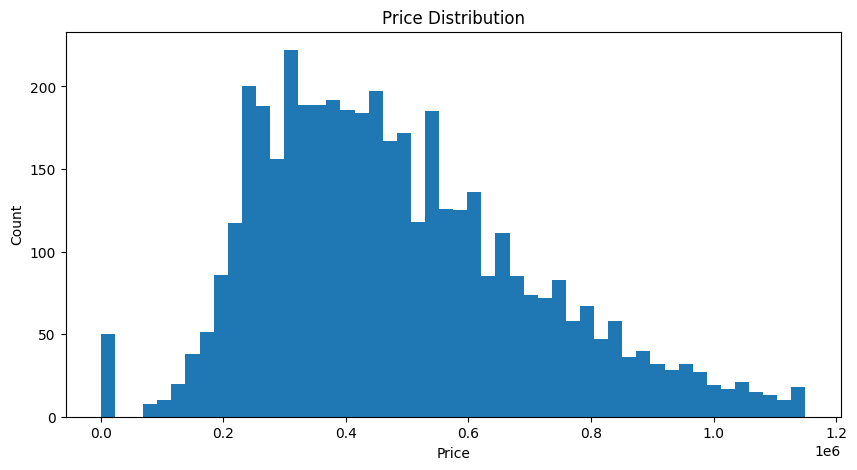

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(y, bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x79ee6d7b97f0>,
 'caps': [<matplotlib.lines.Line2D at 0x79ee6d7b9d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x79ee6d7b9550>],
 'medians': [<matplotlib.lines.Line2D at 0x79ee6d7ba330>],
 'fliers': [<matplotlib.lines.Line2D at 0x79ee6d7ba660>],
 'means': []}

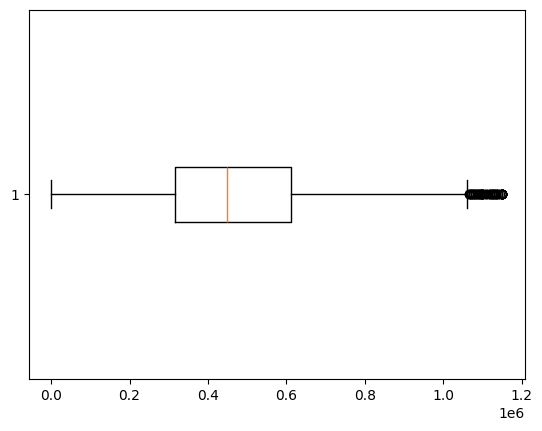

In [16]:
plt.boxplot(y, vert=False)


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [18]:
import numpy as np
num_features = X_train.select_dtypes(include=[np.number]).columns
cat_features = X_train.select_dtypes(exclude=[np.number]).columns

In [19]:
num_features

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built',
       'yr_renovated', 'day', 'month'],
      dtype='object')

In [20]:
cat_features

Index(['street', 'city', 'statezip', 'country'], dtype='object')

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import Ridge,Lasso,LinearRegression

In [22]:
num_pipeline = Pipeline ([
    ('impute',SimpleImputer(strategy='mean')),
    ('scale',StandardScaler())
])

cat_pipeline = Pipeline ([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encode',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

transformer = ColumnTransformer([
    ('num',num_pipeline,num_features),
    ('cat',cat_pipeline,cat_features)
])

In [41]:
# estimator = Ridge(alpha=0.1)
# estimator = LinearRegression()
estimator = Lasso(alpha=1)
pipeline = Pipeline ([
    ('transformer',transformer),
    ('estimator',estimator)
])

In [42]:
pipeline.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.427e+11, tolerance: 1.718e+10
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built',
       'yr_renovated', 'day', 'month'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['street', 'city', 'statezip', 'country'], dtype='object'))])),
                ('estimator', Lasso(alpha=1))])

In [43]:
print(pipeline.score(X_train,y_train))
print(pipeline.score(X_test,y_test))

0.9994334451874347
0.6735984067545534


Linear Regressin Scores:  
0.999794803474419  
0.3933772901043284

Ridge Regression Score:  
0.9971658932263348  
0.6766823916906476  

Lasso Regression Score: 
0.9997373929163106  
0.665305099822689  

Model overfit edir. High variance. 